In [328]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [367]:
df = pd.read_excel('product.xlsx')
df

,Product_ID,Product_Name,Category,Brand,Price,Units_Sold,Customer_Rating,Launch_Year,Processor_Type,RAM,Storage,Battery_Life,Operating_System,Warranty_Period
0,1,UltraPhone X,Smartphone,TechCorp,799,5000,4.5,2021,Snapdragon 888,8,128,24,Android,2
1,2,ProTab 11,Tablet,Innovatech,499,3000,4.3,2020,Apple A14,6,256,10,iOS,1
2,3,GameStation Z,Laptop,MegaSoft,1499,2000,4.8,2022,Intel i7,16,512,8,Windows,3
3,4,WorkPro 15,Laptop,CompMaster,1199,2500,4.2,2021,AMD Ryzen 7,16,1024,12,Windows,2
4,5,SmartWatch Pro,Smartwatch,WearTech,299,8000,4.6,2019,ARM Cortex,1,8,48,Android,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,MegaPhone 5G,Smartphone,PhoneMax,999,6000,4.7,2022,Snapdragon 903,12,256,20,Android,2
96,97,UltraPhone X,Smartphone,TechCorp,799,5000,4.5,2021,Snapdragon 904,8,128,24,Android,2
97,98,ProTab 27,Tablet,Innovatech,499,3000,4.3,2020,Apple A30,6,256,10,iOS,1
98,99,GameStation Z,Laptop,MegaSoft,1499,2000,4.8,2022,Intel i23,16,512,8,Windows,3


In [368]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_ID        100 non-null    int64  
 1   Product_Name      100 non-null    object 
 2   Category          100 non-null    object 
 3   Brand             100 non-null    object 
 4   Price             100 non-null    int64  
 5   Units_Sold        100 non-null    int64  
 6   Customer_Rating   100 non-null    float64
 7   Launch_Year       100 non-null    int64  
 8   Processor_Type    100 non-null    object 
 9   RAM               100 non-null    int64  
 10  Storage           100 non-null    int64  
 11  Battery_Life      100 non-null    int64  
 12  Operating_System  100 non-null    object 
 13  Warranty_Period   100 non-null    int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 11.1+ KB


In [369]:
#  New Feature Creation: Price per GB of Storage
df['Price_per_GB'] = df['Price'] / df['Storage']

In [370]:
df

,Product_ID,Product_Name,Category,Brand,Price,Units_Sold,Customer_Rating,Launch_Year,Processor_Type,RAM,Storage,Battery_Life,Operating_System,Warranty_Period,Price_per_GB
0,1,UltraPhone X,Smartphone,TechCorp,799,5000,4.5,2021,Snapdragon 888,8,128,24,Android,2,6.242188
1,2,ProTab 11,Tablet,Innovatech,499,3000,4.3,2020,Apple A14,6,256,10,iOS,1,1.949219
2,3,GameStation Z,Laptop,MegaSoft,1499,2000,4.8,2022,Intel i7,16,512,8,Windows,3,2.927734
3,4,WorkPro 15,Laptop,CompMaster,1199,2500,4.2,2021,AMD Ryzen 7,16,1024,12,Windows,2,1.170898
4,5,SmartWatch Pro,Smartwatch,WearTech,299,8000,4.6,2019,ARM Cortex,1,8,48,Android,1,37.375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,MegaPhone 5G,Smartphone,PhoneMax,999,6000,4.7,2022,Snapdragon 903,12,256,20,Android,2,3.902344
96,97,UltraPhone X,Smartphone,TechCorp,799,5000,4.5,2021,Snapdragon 904,8,128,24,Android,2,6.242188
97,98,ProTab 27,Tablet,Innovatech,499,3000,4.3,2020,Apple A30,6,256,10,iOS,1,1.949219
98,99,GameStation Z,Laptop,MegaSoft,1499,2000,4.8,2022,Intel i23,16,512,8,Windows,3,2.927734


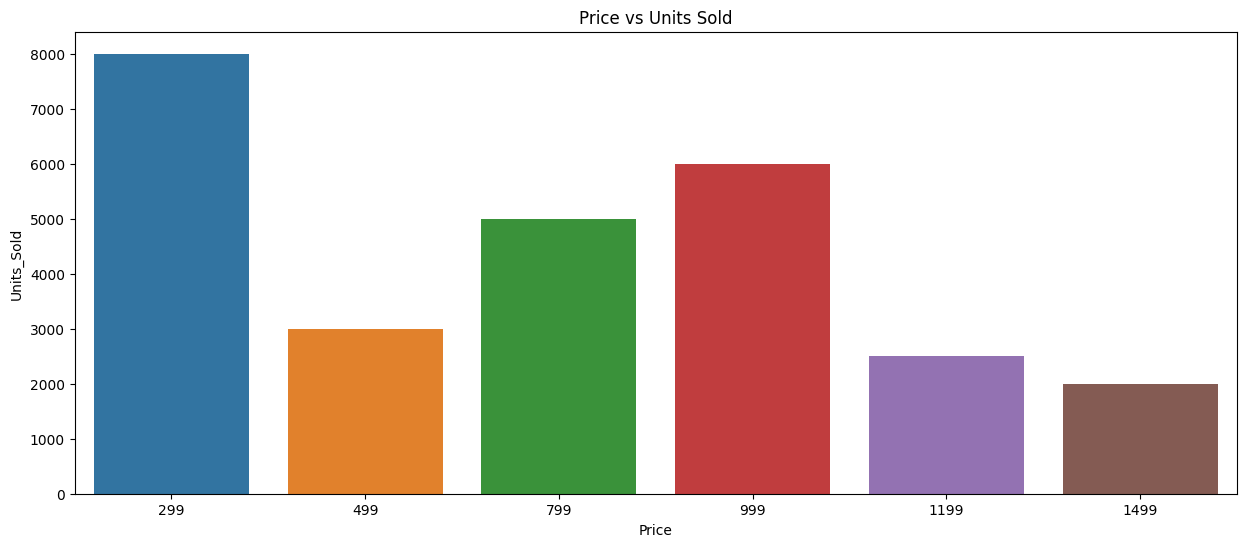

In [371]:

plt.figure(figsize=(15,6))
sns.barplot(data=df, x='Price', y='Units_Sold')
plt.title('Price vs Units Sold')
plt.show()

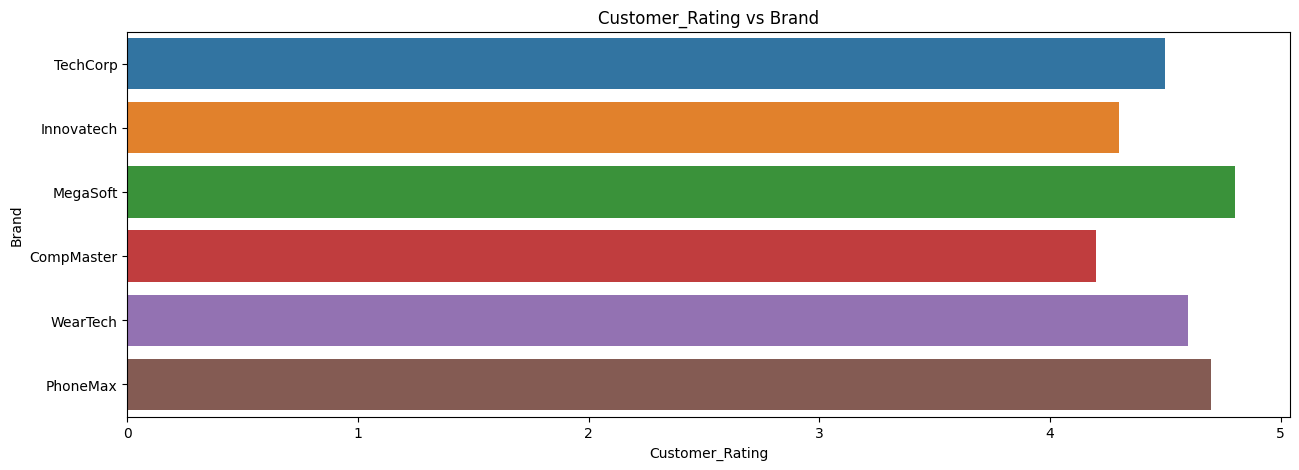

In [372]:


plt.figure(figsize=(15,5))
sns.barplot(data=df, x='Customer_Rating', y='Brand')
plt.title('Customer_Rating vs Brand')
plt.show()

In [373]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Product_ID          0
Product_Name        0
Category            0
Brand               0
Price               0
Units_Sold          0
Customer_Rating     0
Launch_Year         0
Processor_Type      0
RAM                 0
Storage             0
Battery_Life        0
Operating_System    0
Warranty_Period     0
Price_per_GB        0
dtype: int64


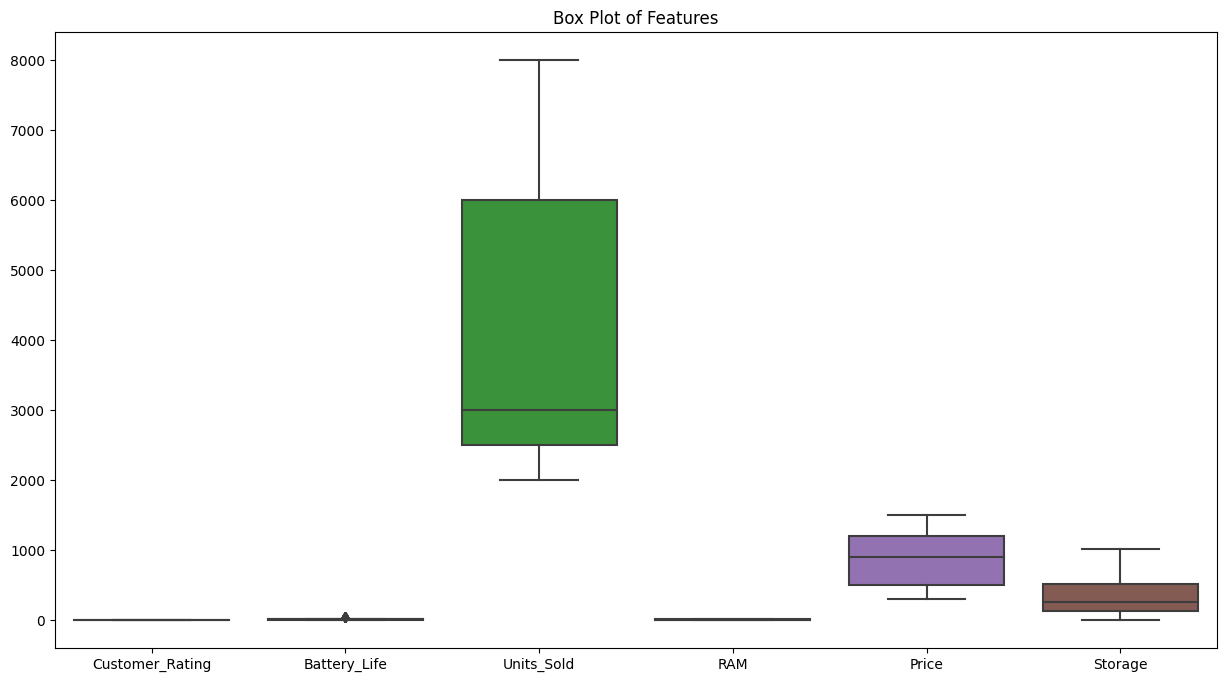

In [374]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
sns.boxplot(data=df[['Customer_Rating', 'Battery_Life','Units_Sold','RAM','Price','Storage']])
plt.title('Box Plot of Features')
plt.show()


In [375]:

z_scores = np.abs(stats.zscore(df[['Customer_Rating', 'Battery_Life','Units_Sold','RAM','Price','Storage']]))
df = df[(z_scores < 3).all(axis=1)] 

In [376]:
from sklearn.preprocessing import StandardScaler

# Instantiate the StandardScaler
scaler = StandardScaler()

# Apply standardization to the specified columns
df[['RAM', 'Battery_Life', 'Price', 'Storage']] = scaler.fit_transform(df[['RAM', 'Battery_Life', 'Price', 'Storage']])


In [377]:
# Encoding Categorical Variables
label_encoder = LabelEncoder()
df['Brand'] = label_encoder.fit_transform(df['Brand'])
df['Operating_System'] = label_encoder.fit_transform(df['Operating_System'])
df['Category'] = label_encoder.fit_transform(df['Category'])
df['Processor_Type'] = label_encoder.fit_transform(df['Processor_Type'])
df['Product_Name'] = label_encoder.fit_transform(df['Product_Name'])




In [378]:
df

,Product_ID,Product_Name,Category,Brand,Price,Units_Sold,Customer_Rating,Launch_Year,Processor_Type,RAM,Storage,Battery_Life,Operating_System,Warranty_Period,Price_per_GB
0,1,20,1,4,-0.216999,5000,4.5,2021,52,-0.351430,-0.721147,0.293250,0,2,6.242188
1,2,2,3,1,-0.956768,3000,4.3,2020,18,-0.721357,-0.337558,-0.748755,2,1,1.949219
2,3,0,0,2,1.509130,2000,4.8,2022,49,1.128276,0.429620,-0.897613,1,3,2.927734
3,4,21,0,0,0.769360,2500,4.2,2021,14,1.128276,1.963976,-0.599897,1,2,1.170898
4,5,19,2,5,-1.449948,8000,4.6,2019,17,-1.646173,-1.080762,2.079544,0,1,37.375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,1,1,3,0.276181,6000,4.7,2022,67,0.388423,-0.337558,-0.004466,0,2,3.902344
96,97,20,1,4,-0.216999,5000,4.5,2021,68,-0.351430,-0.721147,0.293250,0,2,6.242188
97,98,18,3,1,-0.956768,3000,4.3,2020,34,-0.721357,-0.337558,-0.748755,2,1,1.949219
98,99,0,0,2,1.509130,2000,4.8,2022,48,1.128276,0.429620,-0.897613,1,3,2.927734


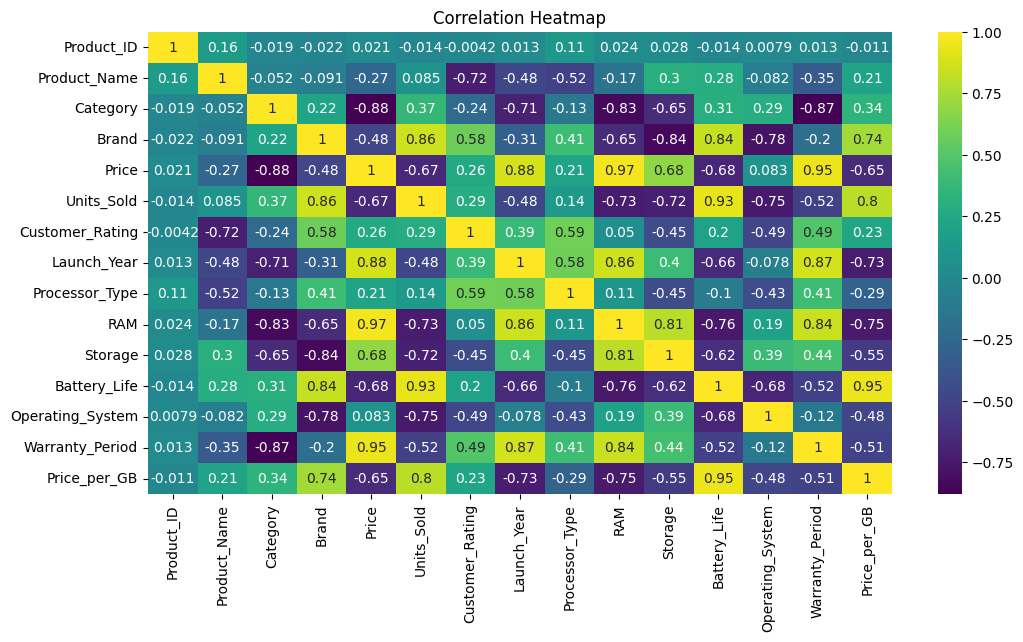

In [379]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

In [380]:

from statsmodels.tools.tools import add_constant

X_vif = df[[ 'Price','Storage', 'Price_per_GB']]
X_vif_with_constant = add_constant(X_vif)

# Calculate VIF
vif = pd.DataFrame()
vif["Feature"] = X_vif.columns
vif["VIF"] = [variance_inflation_factor(X_vif_with_constant.values, i+1) for i in range(X_vif.shape[1])]

print(vif)

        Feature       VIF
0         Price  2.334922
1       Storage  1.955837
2  Price_per_GB  1.780373


In [381]:
df = df.drop(columns=['Product_ID','Launch_Year','Storage'])  # Drop  features

x = df.drop('Units_Sold', axis=1)
y = df['Units_Sold']  # Target

In [382]:
x

,Product_Name,Category,Brand,Price,Customer_Rating,Processor_Type,RAM,Battery_Life,Operating_System,Warranty_Period,Price_per_GB
0,20,1,4,-0.216999,4.5,52,-0.351430,0.293250,0,2,6.242188
1,2,3,1,-0.956768,4.3,18,-0.721357,-0.748755,2,1,1.949219
2,0,0,2,1.509130,4.8,49,1.128276,-0.897613,1,3,2.927734
3,21,0,0,0.769360,4.2,14,1.128276,-0.599897,1,2,1.170898
4,19,2,5,-1.449948,4.6,17,-1.646173,2.079544,0,1,37.375000
...,...,...,...,...,...,...,...,...,...,...,...
95,1,1,3,0.276181,4.7,67,0.388423,-0.004466,0,2,3.902344
96,20,1,4,-0.216999,4.5,68,-0.351430,0.293250,0,2,6.242188
97,18,3,1,-0.956768,4.3,34,-0.721357,-0.748755,2,1,1.949219
98,0,0,2,1.509130,4.8,48,1.128276,-0.897613,1,3,2.927734


In [383]:
y

0     5000
1     3000
2     2000
3     2500
4     8000
      ... 
95    6000
96    5000
97    3000
98    2000
99    2500
Name: Units_Sold, Length: 100, dtype: int64

In [384]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)


In [385]:
# Create linear regression model and fit it on training data
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [386]:
y_test_pred = model.predict(x_test)

In [387]:
y_test_pred

array([3000., 2000., 3000., 3000., 5000., 2500., 3000., 6000., 2000.,
       2000., 2000., 3000., 5000., 6000., 6000., 2000., 2000., 2000.,
       6000., 8000.])

In [388]:
y_test

19    3000
14    2000
43    3000
37    3000
66    5000
3     2500
79    3000
41    6000
38    2000
68    2000
2     2000
1     3000
60    5000
53    6000
95    6000
74    2000
92    2000
26    2000
59    6000
46    8000
Name: Units_Sold, dtype: int64

In [389]:
train_residuals = y_train - y_train_pred


In [390]:
mse = mean_squared_error(y_test,y_test_pred)
print('MSE:',mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

mae = mean_absolute_error(y_test,y_test_pred)
print("MAE:",mae)

r2 = r2_score(y_test,y_test_pred)
print('R2:', r2)

MSE: 6.60167676999743e-23
RMSE: 8.12507031969412e-12
MAE: 6.9462657847907396e-12
R2: 1.0


In [391]:
y_train_pred = model.predict(x_train)
y_train_pred

array([5000., 8000., 2000., 2000., 8000., 3000., 2500., 3000., 5000.,
       2500., 5000., 8000., 5000., 8000., 6000., 2500., 2500., 8000.,
       6000., 5000., 2000., 2000., 6000., 8000., 6000., 2000., 6000.,
       3000., 2500., 3000., 2500., 3000., 2000., 2500., 5000., 8000.,
       5000., 2000., 2000., 6000., 6000., 8000., 3000., 8000., 5000.,
       2500., 8000., 2500., 3000., 6000., 5000., 8000., 5000., 2500.,
       3000., 3000., 2500., 6000., 3000., 2500., 3000., 5000., 5000.,
       2500., 2000., 5000., 6000., 8000., 5000., 8000., 5000., 3000.,
       2000., 6000., 2500., 6000., 8000., 8000., 2500., 2500.])

In [392]:
y_train

90    5000
70    8000
50    2000
44    2000
76    8000
      ... 
89    6000
28    8000
64    8000
15    2500
9     2500
Name: Units_Sold, Length: 80, dtype: int64

In [393]:
mse = mean_squared_error(y_train,y_train_pred)
print('MSE:',mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

mae = mean_absolute_error(y_train,y_train_pred)
print("MAE:",mae)

r2 = r2_score(y_train,y_train_pred)
print('R2:', r2)

MSE: 9.592322425288758e-23
RMSE: 9.794040241539116e-12
MAE: 8.44124770082999e-12
R2: 1.0


In [356]:
from sklearn.linear_model import Lasso



# Instantiate the Lasso model with a specific alpha value for L1 regularization
model = Lasso(alpha=1.0)
model.fit(x_train, y_train)
y_test_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print('MSE:', mse)
print("RMSE:", rmse)
print("MAE:", mae)
print('R2:', r2)


MSE: 2081.148344807791
RMSE: 45.61960482958825
MAE: 33.14483548590313
R2: 0.9993800340063875


C:\Users\Subhra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.585e+05, tolerance: 3.679e+04
  model = cd_fast.enet_coordinate_descent(


In [394]:
from sklearn.linear_model import Ridge


# Instantiate the Ridge model with a specific alpha value for L2 regularization
model = Ridge(alpha=1.0)
model.fit(x_train, y_train)
y_test_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print('MSE:', mse)
print("RMSE:", rmse)
print("MAE:", mae)
print('R2:', r2)


MSE: 26845.74901158741
RMSE: 163.84672414054364
MAE: 140.50671896763265
R2: 0.99200275583345


In [358]:



model = Ridge(alpha=1.0)
model.fit(x_train, y_train)
y_train_pred = model.predict(x_train)

# Evaluate the model
mse = mean_squared_error(y_train,y_train_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train,y_train_pred)
r2 = r2_score(y_train,y_train_pred)

print('MSE:', mse)
print("RMSE:", rmse)
print("MAE:", mae)
print('R2:', r2)

MSE: 17594.91547284189
RMSE: 132.64582719724692
MAE: 97.53527376207649
R2: 0.9961738486960624


In [395]:
train_residuals = y_train - y_train_pred
train_residuals

90    1.455192e-11
70   -4.547474e-12
50    6.139089e-12
44    5.229595e-12
76   -4.547474e-12
          ...     
89    6.366463e-12
28   -4.547474e-12
64   -4.547474e-12
15   -1.728040e-11
9    -1.818989e-11
Name: Units_Sold, Length: 80, dtype: float64

Shapiro-Wilk Test: Statistic=0.9423096179962158, p-value=0.001283173798583448


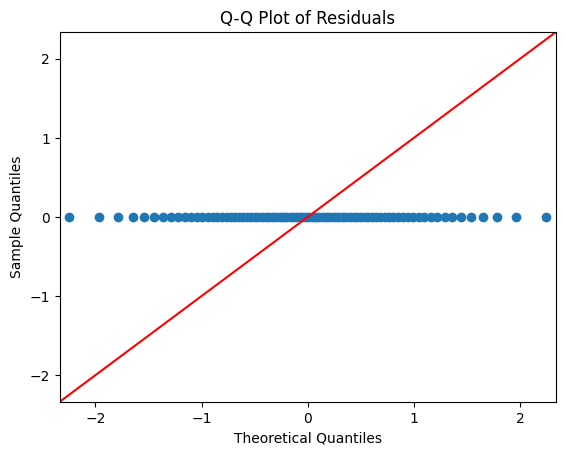

In [396]:
train_residuals = y_train - y_train_pred

shapiro_test = stats.shapiro(train_residuals)
print(f'Shapiro-Wilk Test: Statistic={shapiro_test.statistic}, p-value={shapiro_test.pvalue}')

# Q-Q Plot
sm.qqplot(train_residuals, line='45')
plt.title("Q-Q Plot of Residuals")
plt.show()


In [397]:
import pickle
with open('ridge_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Ridge model saved to ridge_model.pkl")

# Load the Ridge model from the pickle file
with open('ridge_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

print("Ridge model loaded from ridge_model.pkl")

Ridge model saved to ridge_model.pkl
Ridge model loaded from ridge_model.pkl


In [363]:
# df = pd.DataFrame(data)

# # Save DataFrame to CSV
# df.to_csv('product_dataa.csv', index=False)

# print("CSV file created successfully!")

CSV file created successfully!


In [406]:
df1 = x
df1

,Product_Name,Category,Brand,Price,Customer_Rating,Processor_Type,RAM,Battery_Life,Operating_System,Warranty_Period,Price_per_GB
0,20,1,4,-0.216999,4.5,52,-0.351430,0.293250,0,2,6.242188
1,2,3,1,-0.956768,4.3,18,-0.721357,-0.748755,2,1,1.949219
2,0,0,2,1.509130,4.8,49,1.128276,-0.897613,1,3,2.927734
3,21,0,0,0.769360,4.2,14,1.128276,-0.599897,1,2,1.170898
4,19,2,5,-1.449948,4.6,17,-1.646173,2.079544,0,1,37.375000
...,...,...,...,...,...,...,...,...,...,...,...
95,1,1,3,0.276181,4.7,67,0.388423,-0.004466,0,2,3.902344
96,20,1,4,-0.216999,4.5,68,-0.351430,0.293250,0,2,6.242188
97,18,3,1,-0.956768,4.3,34,-0.721357,-0.748755,2,1,1.949219
98,0,0,2,1.509130,4.8,48,1.128276,-0.897613,1,3,2.927734


In [407]:
#df1 = pd.DataFrame(data)

# Save DataFrame to CSV
df1.to_csv('product_data3.csv', index=False)

print("CSV file created successfully!")

CSV file created successfully!
